<a href="https://colab.research.google.com/github/Ajoy03/Song-searching-/blob/main/SongSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
arr=[1,2,3]
arr

[1, 2, 3]

In [ ]:
import numpy as np

In [ ]:
my_arr=np.array(arr)
my_arr

array([1, 2, 3])

In [ ]:
my_arr+my_arr  #

array([2, 4, 6])

In [ ]:
np.sqrt(my_arr) #np.log(my_arr)    np.exp(my_arr)

array([1.        , 1.41421356, 1.73205081])

In [ ]:
np.sin(my_arr) #replace with cos & tan

array([0.84147098, 0.90929743, 0.14112001])

let test is an array given by an organization
for backing up we need to copy the mother file test
let, the copy file name is test1
so, we have to copy using the method
test1=np.arrar(test) , not test1=test




test1.flatten()  #The .flatten() method in NumPy is used to collapse a multi-dimensional array into a one-dimensional array.

test2.reshape(9,8)  # reshaping a 8,9 metrix into 9,8 matrix





In [ ]:
!pip install dask

In [ ]:
#t1=np.arrange(1,10)


In [ ]:
np_arr=np.random.randint(20, size=10)
np_arr

array([ 7,  6,  2, 17,  4, 10, 19, 14, 11, 13])

In [ ]:
import dask.array as ds

In [ ]:
dask_arr=ds.random.randint(20,size=26,chunks=6)
dask_arr

dask.array<randint, shape=(26,), dtype=int64, chunksize=(6,), chunktype=numpy.ndarray>

In [ ]:
dask_arr_from_np= ds.from_array(np_arr,chunks=6)
dask_arr_from_np

dask.array<array, shape=(10,), dtype=int64, chunksize=(6,), chunktype=numpy.ndarray>

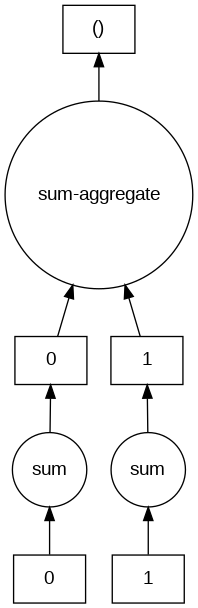

In [ ]:
dask_arr_from_np.sum().visualize()

In [ ]:
dask_arr_large=ds.random.randint(1000000,size=(50000,50000),chunks=(50000,10000))
dask_arr_large

dask.array<randint, shape=(50000, 50000), dtype=int64, chunksize=(50000, 10000), chunktype=numpy.ndarray>

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Load Dataset
df = pd.read_csv("spotify-2023.csv")  # Replace with actual dataset filename

# Combine useful columns into one text feature (adjust according to dataset)
df['combined_features'] = df['track_name'] + " " + df['artist_name'] + " " + df['lyrics'].fillna("")

# Vectorize text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['combined_features'])

# Nearest Neighbors Model
model = NearestNeighbors(n_neighbors=5, metric='cosine')
model.fit(X)

def find_song(snippet):
    query_vec = vectorizer.transform([snippet])
    distances, indices = model.kneighbors(query_vec)

    print("\nTop matching songs:")
    for i, idx in enumerate(indices[0]):
        row = df.iloc[idx]
        print(f"{i+1}. {row['track_name']} by {row['artist_name']} (Similarity: {1 - distances[0][i]:.2f})")

if __name__ == '__main__':
    while True:
        snippet = input("\nEnter a snippet of lyrics or description (or type 'exit' to quit): ").strip()
        if snippet.lower() == 'exit':
            break
        find_song(snippet)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/ML Workshop/spotify-2023.csv')

try:
    df = pd.read_csv("/content/drive/MyDrive/ML Workshop/spotify-2023.csv", encoding="latin1") # or encoding="cp1252"
except UnicodeDecodeError:
    print("latin1 or cp1252 did not work, trying utf-8 with errors ignored")
    df = pd.read_csv("/content/drive/MyDrive/ML Workshop/spotify-2023.csv", encoding="utf-8", errors = 'ignore')

In [ ]:
#df['combined_features'] = df['track_name'] + " " + df['artist_name'] + " " + df['lyrics'].fillna("")
if 'lyrics' in df.columns:
    df['combined_features'] = df['track_name'] + " " + df['artist_name'] + " " + df['lyrics'].fillna("")
else:
    # Handle the case where 'lyrics' column is not found
    print("The 'lyrics' column was not found in the DataFrame.")
    # You can either skip this column or raise an error
    # For example, you could create an empty 'combined_features' column:
    df['combined_features'] = df['track_name'] + " " + df['artist_name']

The 'lyrics' column was not found in the DataFrame.


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['combined_features'])


In [ ]:
model = NearestNeighbors(n_neighbors=5, metric='cosine')
model.fit(X)

NearestNeighbors(metric='cosine')

In [ ]:
def find_song(snippet):
    query_vec = vectorizer.transform([snippet])
    distances, indices = model.kneighbors(query_vec)

    print("\nTop matching songs:")
    for i, idx in enumerate(indices[0]):
        row = df.iloc[idx]
        print(f"{i+1}. {row['track_name']} by {row['artist_name']} (Similarity: {1 - distances[0][i]:.2f})")

if __name__ == '__main__':
    while True:
        snippet = input("\nEnter a snippet of lyrics or description (or type 'exit' to quit): ").strip()
        if snippet.lower() == 'exit':
            break
        find_song(snippet)


Enter a snippet of lyrics or description (or type 'exit' to quit): ed saran

Top matching songs:
1. Shape of You by Ed Sheeran (Similarity: 0.50)
2. Photograph by Ed Sheeran (Similarity: 0.50)
3. Shivers by Ed Sheeran (Similarity: 0.50)
4. Celestial by Ed Sheeran (Similarity: 0.50)
5. Perfect by Ed Sheeran (Similarity: 0.50)

Enter a snippet of lyrics or description (or type 'exit' to quit): exit
